<a href="https://colab.research.google.com/github/Bertjackcai/BrainPy/blob/master/NMA_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install cryptography==3.3.2
!pip install --quiet nma-ibl
!pip install ssm
!pip install scipy==1.2.1

     |████████████████████████████████| 2.6MB 19.4MB/s 
     |████████████████████████████████| 102kB 9.1MB/s 
     |████████████████████████████████| 51kB 6.3MB/s 
     |████████████████████████████████| 81kB 8.0MB/s 
     |████████████████████████████████| 317kB 29.2MB/s 
  Created wheel for ssm: filename=ssm-0.0.1-cp37-cp37m-linux_x86_64.whl size=679444 sha256=6de4b561afad30c1762001e0c1ba26b53f7aa151592e827ee68c103eb30638dc
  Stored in directory: /root/.cache/pip/wheels/7a/26/7f/279606a509bdc1b2bd8659632f406e1c5a8fe58b733a28c791
Successfully built ssm
     |████████████████████████████████| 24.8MB 118kB/s 
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: scipy 1.4.1
    Uninstalling scipy-1.4.1:
      Successfully uninstalled scipy-1.4.1


In [ ]:
# Download data needed for plot recreation
!wget https://github.com/vathes/nma-ibl/raw/master/uuids_trained1.npy

--2021-07-18 12:48:24--  https://github.com/vathes/nma-ibl/raw/master/uuids_trained1.npy
Resolving github.com (github.com)... 140.82.112.4
Connecting to github.com (github.com)|140.82.112.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/vathes/nma-ibl/master/uuids_trained1.npy [following]
--2021-07-18 12:48:24--  https://raw.githubusercontent.com/vathes/nma-ibl/master/uuids_trained1.npy
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3483 (3.4K) [application/octet-stream]
Saving to: ‘uuids_trained1.npy’

uuids_trained1.npy  100%[===================>]   3.40K  --.-KB/s    in 0s      

2021-07-18 12:48:24 (52.5 MB/s) - ‘uuids_trained1.npy’ saved [3483/3483]



In [ ]:
import datajoint as dj
dj.config['database.host'] = 'datajoint-public.internationalbrainlab.org'
dj.config['database.user'] = 'nma-ibl-public'
dj.config['database.password'] = 'ibl.pipeline.public.demo'


In [ ]:
# behavior data
from nma_ibl import behavior
# analysis result on behavioral data
from nma_ibl import behavior_analyses
# meta information about subjects and sessions
from nma_ibl import subject, acquisition
# A utility function to perform the model fits of the psychometric function
from nma_ibl import psychofit as psy

# some standard packages
import numpy as np
import datetime
import seaborn as sns 
import matplotlib.pyplot as plt
import numpy as np
import numpy.random as npr
import matplotlib.pyplot as plt
import ssm
import datajoint as dj
from ssm.util import find_permutation

Connecting nma-ibl-public@datajoint-public.internationalbrainlab.org:3306


In [ ]:
from nma_ibl import reference, subject, action, acquisition, data, behavior, behavior_analyses

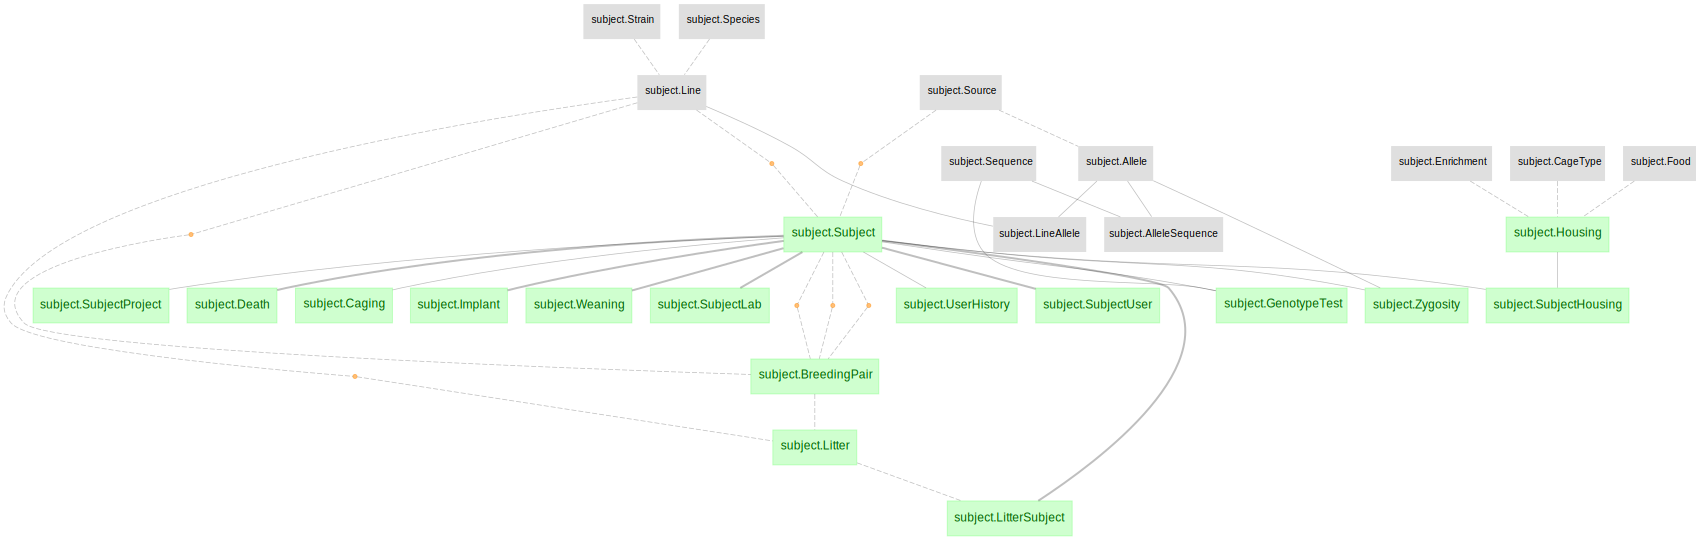

In [ ]:
dj.Diagram(subject)

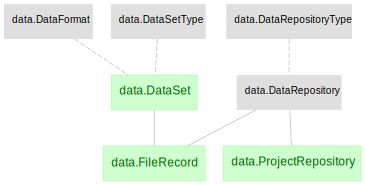

In [ ]:
dj.Diagram(data)

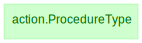

In [ ]:
dj.Diagram(action)

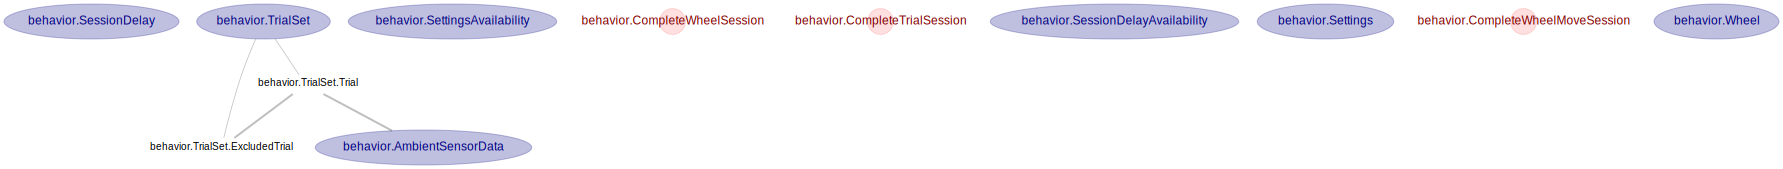

In [ ]:
dj.Diagram(behavior)

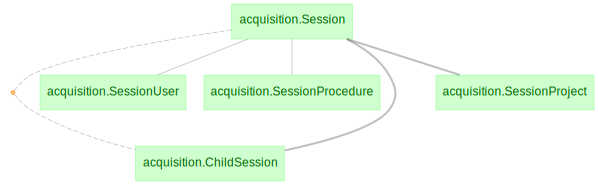

In [ ]:
dj.Diagram(acquisition)

In [ ]:
data.FileRecord.describe()

-> data.DataSet
-> data.DataRepository
---
record_uuid          : uuid                         
exists               : tinyint                      
relative_path        : varchar(255)                 



'-> data.DataSet\n-> data.DataRepository\n---\nrecord_uuid          : uuid                         \nexists               : tinyint                      \nrelative_path        : varchar(255)                 \n'

In [ ]:
action.ProcedureType.describe()

procedure_type_name  : varchar(255)                 
---
procedure_type_uuid  : uuid                         
procedure_type_description=null : varchar(1024)                
proceduretype_ts=CURRENT_TIMESTAMP : timestamp                    



'procedure_type_name  : varchar(255)                 \n---\nprocedure_type_uuid  : uuid                         \nprocedure_type_description=null : varchar(1024)                \nproceduretype_ts=CURRENT_TIMESTAMP : timestamp                    \n'

In [ ]:
behavior.CompleteWheelSession.describe()

# sessions that are complete with wheel related information and thus may be ingested
-> acquisition.Session
---
wheel_velocity_status : enum('Missing','Complete')   



"# sessions that are complete with wheel related information and thus may be ingested\n-> acquisition.Session\n---\nwheel_velocity_status : enum('Missing','Complete')   \n"

In [ ]:
behavior.CompleteTrialSession.describe()

# sessions that are complete with trial information and thus may be ingested
-> acquisition.Session
---
stim_on_times_status : enum('Complete','Partial','Missing') 
rep_num_status       : enum('Complete','Missing')   
included_status      : enum('Complete','Missing')   
ambient_sensor_data_status : enum('Complete','Missing')   
go_cue_times_status  : enum('Complete','Missing')   
go_cue_trigger_times_status : enum('Complete','Missing')   
reward_volume_status : enum('Complete','Missing')   
iti_duration_status  : enum('Complete','Missing')   



"# sessions that are complete with trial information and thus may be ingested\n-> acquisition.Session\n---\nstim_on_times_status : enum('Complete','Partial','Missing') \nrep_num_status       : enum('Complete','Missing')   \nincluded_status      : enum('Complete','Missing')   \nambient_sensor_data_status : enum('Complete','Missing')   \ngo_cue_times_status  : enum('Complete','Missing')   \ngo_cue_trigger_times_status : enum('Complete','Missing')   \nreward_volume_status : enum('Complete','Missing')   \niti_duration_status  : enum('Complete','Missing')   \n"

In [ ]:
behavior.CompleteWheelMoveSession.describe()

# sessions that are complete with wheel related information and thus may be ingested
-> acquisition.Session



'# sessions that are complete with wheel related information and thus may be ingested\n-> acquisition.Session\n'

In [ ]:
acquisition.Session.describe()

-> subject.Subject
session_start_time   : datetime                     # start time
---
session_uuid         : uuid                         
session_number=null  : int                          # number
session_end_time=null : datetime                     # end time
-> [nullable] reference.LabLocation.proj(session_lab="lab_name",session_location="location_name")
task_protocol=null   : varchar(255)                 
session_type=null    : varchar(255)                 # type
session_narrative=null : varchar(2048)                
session_ts=CURRENT_TIMESTAMP : timestamp                    



'-> subject.Subject\nsession_start_time   : datetime                     # start time\n---\nsession_uuid         : uuid                         \nsession_number=null  : int                          # number\nsession_end_time=null : datetime                     # end time\n-> [nullable] reference.LabLocation.proj(session_lab="lab_name",session_location="location_name")\ntask_protocol=null   : varchar(255)                 \nsession_type=null    : varchar(255)                 # type\nsession_narrative=null : varchar(2048)                \nsession_ts=CURRENT_TIMESTAMP : timestamp                    \n'

In [ ]:
behavior.TrialSet.Trial.describe();

-> behavior.TrialSet
trial_id             : int                          # trial identification number
---
trial_start_time     : double                       # beginning of quiescent period time (seconds)
trial_end_time       : double                       # end of iti (seconds)
trial_response_time=null : double                       # Time of "response" in choiceworld (seconds). This is when one of the three possible choices is registered in software, will not be the same as when the mouse's movement to generate that response begins.
trial_response_choice : enum('CCW','CW','No Go')     # which choice was made in choiceworld
trial_stim_on_time=null : double                       # Time of stimulus in choiceworld (seconds)
trial_stim_contrast_left : float                        # contrast of the stimulus on the left
trial_stim_contrast_right : float                        # contrast of the stimulus on the right
trial_feedback_time=null : double                       # Time of feedback 

In [ ]:
behavior_analyses.PsychResultsBlock.describe()

-> behavior.TrialSet
prob_left_block      : int                          # block number representing the probability left
---
prob_left            : float                        # 0.5 for trainingChoiceWorld, actual value for biasedChoiceWorld
signed_contrasts     : blob                         # contrasts used in this session, negative when on the left
n_trials_stim        : blob                         # number of trials for each contrast
n_trials_stim_right  : blob                         # number of reporting "right" trials for each contrast
prob_choose_right    : blob                         # probability of choosing right, same size as contrasts
threshold            : float                        
bias                 : float                        
lapse_low            : float                        
lapse_high           : float                        



'-> behavior.TrialSet\nprob_left_block      : int                          # block number representing the probability left\n---\nprob_left            : float                        # 0.5 for trainingChoiceWorld, actual value for biasedChoiceWorld\nsigned_contrasts     : blob                         # contrasts used in this session, negative when on the left\nn_trials_stim        : blob                         # number of trials for each contrast\nn_trials_stim_right  : blob                         # number of reporting "right" trials for each contrast\nprob_choose_right    : blob                         # probability of choosing right, same size as contrasts\nthreshold            : float                        \nbias                 : float                        \nlapse_low            : float                        \nlapse_high           : float                        \n'

The following is a binary prediction using the example of logistic regression:

In [ ]:
q = behavior_analyses.PsychResultsBlock & (subject.Subject & 'subject_nickname="CSHL_015"')
q & 'session_start_time > "2019-09-15"'
psych_results = q & {'session_start_time': datetime.datetime(2019, 9, 16, 13, 44, 46)}
dict_results = psych_results.fetch(
    'signed_contrasts', 'prob_choose_right', 'n_trials_stim', 'n_trials_stim_right',
    'threshold', 'bias', 'lapse_low', 'lapse_high', as_dict=True)


这里是把学好的threshold,slope，gamma1,和gamma2直接导入了吗？然后和数据里的prob_choose_right做对比？

[-12.7676, 44.929, 0.0582509, 0.0621766]
[20.2507, 53.3714, 8.94956e-13, 0.128377]
[65.2483, 80.6509, 8.30313e-13, 0.0901264]


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Rightward Choice (%)')

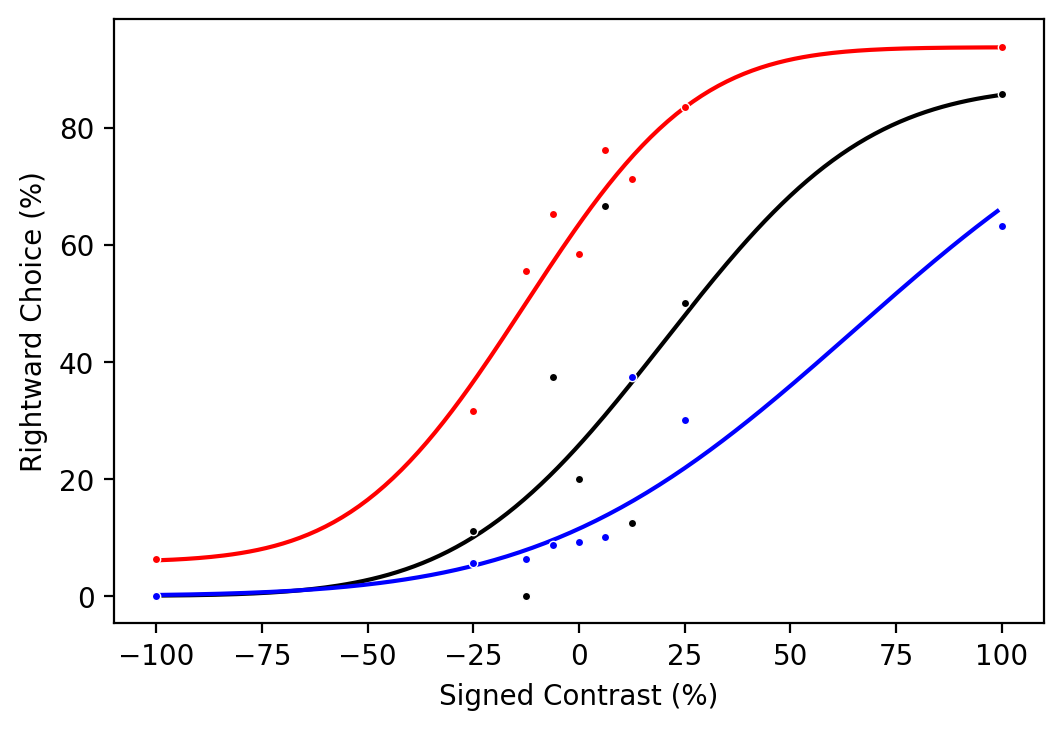

In [ ]:
colors = [[1., 0., 0.], [0., 0., 0.], [0., 0., 1.]]
fig, ax = plt.subplots(1, 1, dpi=200)

for result, color in zip(dict_results, colors):
    pars = [result['bias'], result['threshold'], result['lapse_low'], result['lapse_high']]
    print (pars)
    contrasts = result['signed_contrasts'] * 100
    contrasts_fit = np.arange(-100, 100)
    prob_right_fit = psy.erf_psycho_2gammas(pars, contrasts_fit) *100
    sns.lineplot(contrasts_fit, prob_right_fit, color=color, ax=ax)

    sns.lineplot(x=contrasts, y=result['prob_choose_right']*100, err_style="bars", linewidth=0, linestyle='None', mew=0.5,
            marker='.', ci=68, color=color, ax=ax)

# add axis labels
ax.set_xlabel('Signed Contrast (%)')
ax.set_ylabel('Rightward Choice (%)')

These are the values ​​of the three sets of pars for the instance:



```
[-12.7676, 44.929, 0.0582509, 0.0621766]
[20.2507, 53.3714, 8.94956e-13, 0.128377]
[65.2483, 80.6509, 8.30313e-13, 0.0901264]
```



The following is the source code of the psy.erf_psycho_2gammas method:



```
with open(psy.__file__,'r') as f:
    print(f.read())



def erf_psycho_2gammas(pars, xx):
    """
    erf function from 0 to 1, with two lapse rates.
    Args:
        pars: Model parameters [threshold, slope, gamma].
        xx: vector of stim levels (%)
    Returns:
        ff: A vector of length xx

    Examples:
        >>> import numpy as np
        >>> import matplotlib.pyplot as plt
        >>> xx = np.arange(-50,50)
        >>> ff = erf_psycho_2gammas(np.array(-10., 10., 0.2, 0.),xx)
        >>> plt.plot(xx,ff)

    Raises:
        ValueError: pars must be a vector of length 3
        ValueError: each of the three parameters must be scalar
        TypeError: pars must be a list or numpy array

    Information:
        2000    MC wrote it
        2018-08 MW ported to Python
    """
    # Validate input
    if isinstance(pars, (list, tuple)):
        pars = np.array(pars)
    elif not isinstance(pars, np.ndarray):
        raise TypeError('pars must be a list or numpy array')

    if pars.shape[0] != 4:
        raise ValueError('pars must be a vector of length 4')
    threshold	= pars[0]
    slope	= pars[1]
    gamma1	= pars[2]
    gamma2	= pars[3]

    if (threshold.size!=1) or (slope.size!=1) or (gamma1.size!=1) or (gamma2.size!=1):
        ValueError('each of the three parameters must be scalar')

    return gamma1 + (1 - gamma1 - gamma2) * (erf( (xx-threshold)/slope ) + 1 )/2
```



I think we need to determine the elements contained in the specific initial probability matrix (for example: task completed / task not completed-using this binary hypothesis?), the probability transition matrix (what conditions are included?), and the emission probability matrix ( 
The specific influencing factors)-these may need to be unified.

Which parameters in the IBL database are used to construct this predictive model?

1: Hidden state (and initial state classification) is: enum('complete','missing') or: enum('CCW','CW','NoGo')?

2:

The following is a framework for using HMM to predict mouse behavior:

In [ ]:
!pip install hmmlearn

     |████████████████████████████████| 378kB 28.7MB/s 


In [ ]:
import numpy as np
from hmmlearn import hmm
np.random.seed(42)

In [ ]:
with open(hmm.__file__,'r') as f:
    print(f.read())

# Hidden Markov Models
#
# Author: Ron Weiss <ronweiss@gmail.com>
#         Shiqiao Du <lucidfrontier.45@gmail.com>
# API changes: Jaques Grobler <jaquesgrobler@gmail.com>
# Modifications to create of the HMMLearn module: Gael Varoquaux
# More API changes: Sergei Lebedev <superbobry@gmail.com>

"""
The :mod:`hmmlearn.hmm` module implements hidden Markov models.
"""

import functools
import inspect
import logging

import numpy as np
from scipy import linalg, special
from sklearn import cluster
from sklearn.utils import check_random_state

from . import _utils
from .stats import log_multivariate_normal_density
from .base import _BaseHMM
from .utils import fill_covars, log_mask_zero, log_normalize, normalize

__all__ = ["GMMHMM", "GaussianHMM", "MultinomialHMM"]


_log = logging.getLogger(__name__)
COVARIANCE_TYPES = frozenset(("spherical", "diag", "full", "tied"))


def _check_and_set_gaussian_n_features(model, X):
    _, n_features = X.shape
    if hasattr(model, "n_features") and model

In [ ]:
model = hmm.GaussianHMM(n_components=3, covariance_type="full")
#Initial state occupation distribution.
model.startprob_ = np.array([0.6, 0.3, 0.1])
# Matrix of transition probabilities between states：这里导入IBL数据作为转移概率学习
model.transmat_ = np.array([[0.7, 0.2, 0.1],
               [0.3, 0.5, 0.2],
               [0.3, 0.3, 0.4]])
model.means_ = np.array([[0.0, 0.0], [3.0, -3.0], [5.0, 10.0]])
'''
Covariance parameters for each state.
The shape depends on :attr:`covariance_type`::
(n_components, )      if "spherical",
(n_components, n_features) if "diag",
(n_components, n_features, n_features)  if "full"
(n_features, n_features)          if "tied",
'''
model.covars_ = np.tile(np.identity(2), (3, 1, 1))
X, Z = model.sample(100)

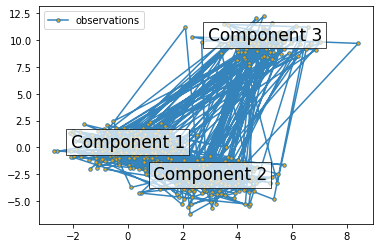

In [ ]:
# Generate samples
X, Z = model.sample(500)

# Plot the sampled data
plt.plot(X[:, 0], X[:, 1], ".-", label="observations", ms=7,
         mfc="orange", alpha=0.9)

# Indicate the component numbers
for i, m in enumerate(model.means_):
    plt.text(m[0], m[1], 'Component %i' % (i + 1),
             size=17, horizontalalignment='center',
             bbox=dict(alpha=.7, facecolor='w'))
plt.legend(loc='best')
plt.show()

In [ ]:
pi = {'Healthy': 0.6, 'Fever': 0.4} #初始状态矩阵


A = {
   'Healthy' : {'Healthy': 0.7, 'Fever': 0.3},
   'Fever' : {'Healthy': 0.4, 'Fever': 0.6},
   } #状态矩阵

B =  {
   'Healthy' : {'normal': 0.5, 'cold': 0.4, 'dizzy': 0.1},
   'Fever' : {'normal': 0.1, 'cold': 0.3, 'dizzy': 0.6},
} # 发射矩阵
print (A)

{'Healthy': {'Healthy': 0.7, 'Fever': 0.3}, 'Fever': {'Healthy': 0.4, 'Fever': 0.6}}


For evaluation models, predictive models and learning models, the way we solve them is different.
Our final observation corresponds to the observed value-not the state value.
Use EM (Expectation-maximization) algorithm-to learn the required parameters:

In [ ]:
class HMM(object):
    def fit(self, X):
        '''
        根据给定观测序列反推参数
        '''
        # 初始化参数 pi, A, B
        self.pi = np.random.sample(self.N)
        self.A = np.ones((self.N,self.N)) / self.N
        self.B = np.ones((self.N,self.M)) / self.M
        self.pi = self.pi / self.pi.sum()
        T = len(X)
        for _ in range(50):
            # 按公式计算下一时刻的参数
            alpha, beta = self.get_something(X)
            gamma = alpha * beta

            for i in range(self.N):
                for j in range(self.N):
                    self.A[i,j] = np.sum(alpha[:-1,i]*beta[1:,j]*self.A[i,j]*self.B[j,X[1:]]) / gamma[:-1,i].sum()

            for j in range(self.N):
                for k in range(self.M):
                    self.B[j,k] = np.sum(gamma[:,j]*(X == k)) / gamma[:,j].sum()
            
            self.pi = gamma[0] / gamma[-1].sum()


    def get_something(self, X):
        '''
        根据给定数据与参数，计算所有时刻的前向概率和后向概率
        '''
        T = len(X)
        alpha = np.zeros((T,self.N))
        alpha[0,:] = self.pi * self.B[:,X[0]]
        for i in range(T-1):
            x = X[i+1]
            alpha[i+1,:] = np.sum(self.A * alpha[i].reshape(-1,1) * self.B[:,x].reshape(1,-1), axis=0)

        beta = np.ones((T,self.N))
        for j in range(T-1,0,-1):
            for i in range(self.N):
                beta[j-1,i] = np.sum(self.A[i,:] * self.B[:,X[j]] * beta[j])

        return alpha, beta

if __name__ == "__main__":
    import matplotlib.pyplot as plt
    import numpy as np
    def triangle_data(T):   # 生成三角波形状的序列
        data = []
        for x in range(T):
            x = x % 6
            data.append(x if x <= 3 else 6-x)
        return data
    
    data = np.array(triangle_data(30))
    print (data)
    hmm = HMM(10,4)
    hmm.fit(data)               # 先根据给定数据反推参数
    gen_obs = hmm.generate(30)  # 再根据学习的参数生成数据
    x = np.arange(30)
    plt.scatter(x, gen_obs, marker='*', color='r')
    plt.plot(x, data, color='g')
    plt.show()

[0 1 2 3 2 1 0 1 2 3 2 1 0 1 2 3 2 1 0 1 2 3 2 1 0 1 2 3 2 1]


TypeError: ignored